# Lab 3 Individual Analysis - Energy Measurements

This exercise will introduce (and beat to death) fitting a line to data.  You should also learn the utility of transforming data sets so that they display as a line, the most easily recognizable function.

In [1]:
import numpy as np  # import the numpy library functions.
import scipy.constants as const # import physical constants
import matplotlib.pyplot as plt # plotting functions
import uncertainties as unc # Uncertainties package.  Good for simple error propagation
# directive below puts the plots in the notebook
%matplotlib inline

## PMT Gain Analysis

From the collected data of peak height vs. high-voltage bias, carry out the following analysis:

1. Convert each peak voltage range to a median and uncertainty.  For example if the listed voltage is "12.3 - 14.5 mV" convert it to (12.3+14.5)/2 plus or minus (14.5-12.3)/2, i.e., 13.4 +/- 1.1.  Accomplish this by putting the numbers into NumPy arrays which are then used to create new arrays.

2. Plot the median voltage vs HV bias on a double-log scale.  If the model for PMT gain is mostly correct, the result should be points lying along a line.

3. Fit the data to obtain the slope of the line on the double-log plot.  The slope should be a number close to the number of dynode stages.

### Step 1. Enter and reduce the data set

Create the dat set arrays:

In [2]:
# From the data set, create arrays to manipulate.  
# One suggested way is below, where the "low" and "hi" are the low and high values for
# each peak.

# You are welcome to use other ways to create the data sets

HV_data = np.arange(400.,1000.,50.)
peak_heights_low = np.array([1.46, 3.68, 8.52, 18.6, 38.2, 71.4, 132.0, 237.0, 395.0, 646.0, 1010.0, 1520.0])
peak_heights_hi  = np.array([1.68, 4.12, 9.80, 20.8, 42.0, 83.2, 155.0, 267.5, 449.0, 730.0, 1155.0, 1690.0])

Manipulate them to obtain midpoints and uncertainty.  Then print out using the code at the bottom (or your version of it).

In [3]:
# Create new arrays, according to the calculations above

peak_heights_mid = (peak_heights_hi+peak_heights_low)/2
peak_heights_delta = (peak_heights_hi-peak_heights_low)/2

# Use the following to print out.  Note the use of the "zip()" function
for V, peak, delta_peak in zip(HV_data, peak_heights_mid, peak_heights_delta):
    print('{:.0f} V: {:7.2f} +/- {:5.2f} mV'.format(V,peak,delta_peak))

400 V:    1.57 +/-  0.11 mV
450 V:    3.90 +/-  0.22 mV
500 V:    9.16 +/-  0.64 mV
550 V:   19.70 +/-  1.10 mV
600 V:   40.10 +/-  1.90 mV
650 V:   77.30 +/-  5.90 mV
700 V:  143.50 +/- 11.50 mV
750 V:  252.25 +/- 15.25 mV
800 V:  422.00 +/- 27.00 mV
850 V:  688.00 +/- 42.00 mV
900 V: 1082.50 +/- 72.50 mV
950 V: 1605.00 +/- 85.00 mV


### Step 2. Plot the peak heights versus HV values

Use the `plt.errorbar()` plotting form to allow error bars to be plotted along with the points.  The error bars should be proportional to the "uncertainty" array values.  (Search for `pyplot.errorbar()` to see how to use this form.)

Plot with both linear and double-logarithmic axes to see how the data become "linearized."  (Hint: `plt.yscale('log')`)

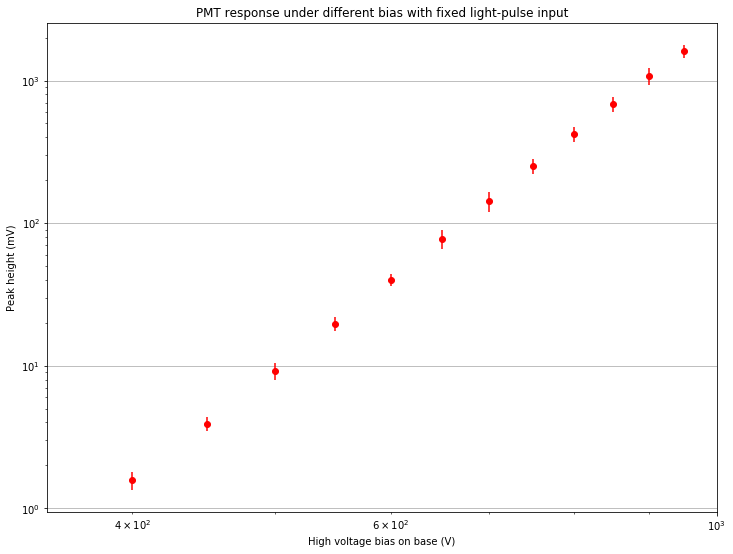

In [4]:
plt.figure(figsize=(12,9))
plt.xlim(350,1000)
plt.grid(True)
plt.xlabel('High voltage bias on base (V)')
plt.ylabel('Peak height (mV)')
plt.title('PMT response under different bias with fixed light-pulse input')
plt.yscale('log')
plt.xscale('log')
plt.errorbar(HV_data,peak_heights_mid,yerr=2*peak_heights_delta,fmt='ro');

### Step 3. Fit the log of the data sets to a line, and find the slope

**SOMETHING NEW:** The **lmfit** package is a useful add-on to the SciPy fitting functions.  This package simplifies fitting data to a variety of standard functions.  See the [Lmfit Documentation](https://lmfit.github.io/lmfit-py/index.html) for a full discussion.  The package is quite powerful, but for basic fitting with common functions, it is very easy to use.  

#### Example: Fitting a line

The example below shows how to use the package to fit data to a line, obtain the fit parameters along with uncertainties, and then plot the data and fit. Execute the cell and study how it works.
(Note: the data come from a calibration problem in physics 331)


[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 9
    # variables        = 2
    chi-square         = 0.18041902
    reduced chi-square = 0.02577415
    Akaike info crit   = -31.1872805
    Bayesian info crit = -30.7928313
[[Variables]]
    slope:      15.4639413 +/- 0.01139807 (0.07%) (init = 15.46394)
    intercept:  3.20598011 +/- 0.38164201 (11.90%) (init = 3.20598)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.990

Slope =  15.463941344548298 +/- 0.01139806675222934


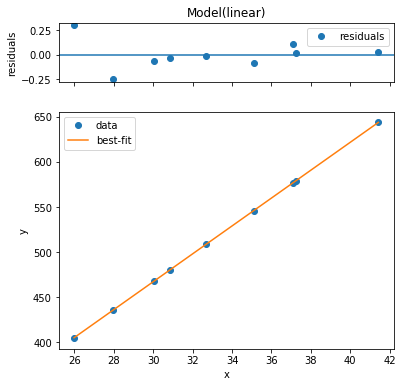

In [5]:
# Calibration Data
# First column is wavelength (nm), second is carriage poisition (cm)
#
Cal_data = np.array([
    [643.85, 41.43],
    [579.07, 37.24],
    [576.96, 37.11],
    [546.08, 35.10],
    [508.58, 32.68],
    [479.99, 30.83],
    [467.81, 30.04],
    [435.83, 27.96],
    [404.66, 25.98]])

# Array slicing separates x (position) and y (wavelength)
# Goal of calibration is to be able to feed in a position and obtain a wavelength
wavelength = Cal_data[:,0]
position = Cal_data[:,1]

# imports a linear fitting model from lmfit
from lmfit.models import LinearModel

# create an instance of the model
line = LinearModel()

# One must have a guess of the parameters. The guess() method works with most of the standard
# lmfit models
param_guess = line.guess(wavelength, x=position)

# The line below executes the fitting process.  The results are returned to "line_fit"
line_fit = line.fit(wavelength, param_guess, x=position)

# This prints the results in an easy to read form
print(line_fit.fit_report())

# The parameters and uncertainties are accessible as follows, for example:
print('\nSlope = ',line_fit.params['slope'].value,'+/-',line_fit.params['slope'].stderr)

#Then you can plot the results quickly just to see how it looks using the plot() method
line_fit.plot();

#### Adapt the above to your problem

To adapt the linear model, you would need to transform the data with a `log()` function, run the fit, and then transform the fit back to plot against the original data.  Alternately, you could fit to the power law model, available in the lmfit package.  You decide.  Either way, determine the exponent $n$ in the PMT gain model
$$ G = \delta^n = (KV_d)^n $$

In [6]:
# You can feed np.log(peak_heights_mid), and similar directly to the fitting functions.
# There is no need to create a second set of arrays

line = LinearModel()

param_guess = line.guess(np.log(peak_heights_mid), x=np.log(HV_data))
linefit = line.fit(np.log(peak_heights_mid), param_guess, x=np.log(HV_data))

print(linefit.fit_report())

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 12
    # variables        = 2
    chi-square         = 0.00438980
    reduced chi-square = 4.3898e-04
    Akaike info crit   = -90.9605317
    Bayesian info crit = -89.9907184
[[Variables]]
    slope:      8.08561658 +/- 0.02252828 (0.28%) (init = 8.085617)
    intercept: -48.0199505 +/- 0.14610662 (0.30%) (init = -48.01995)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.999


#### Calculate a fit line
Make a fitline in the original data space by taking antilogs (np.exp()) of the line fit values.  You need to supply voltages to calculate the fitted values

In [7]:
# Make an array of arbitrary values between 350 an 1000 volts
V_values = np.arange(350,1000,20)

#Then use the model to evaluate the fit values from these
fitline = np.exp(linefit.eval(linefit.params,x=np.log(V_values)))

Redo the plot above in Step 2, including the fitline.

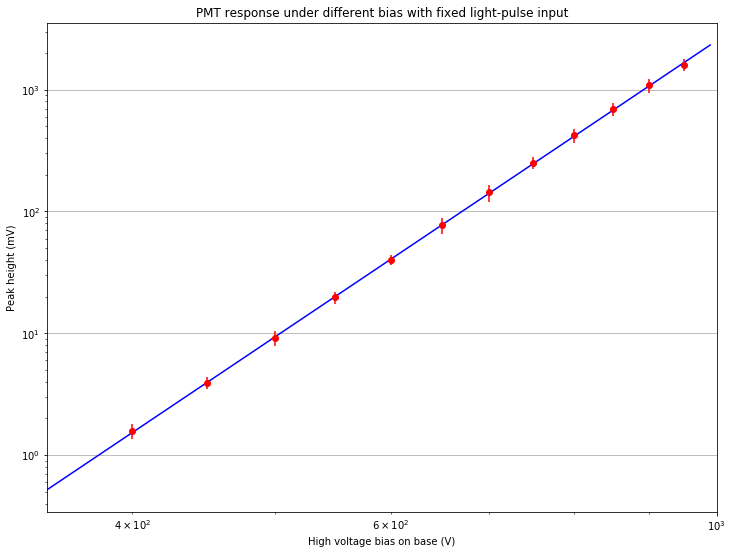

In [8]:
# Add the line to the previous plot
plt.figure(figsize=(12,9))
plt.xlim(350,1000)
plt.grid(True)
plt.xlabel('High voltage bias on base (V)')
plt.ylabel('Peak height (mV)')
plt.title('PMT response under different bias with fixed light-pulse input')
plt.yscale('log')
plt.xscale('log')
plt.errorbar(HV_data,peak_heights_mid,yerr=2*peak_heights_delta,fmt='ro')
plt.plot(V_values,fitline,'b-', label="Fit");

### Don't forget to obtain $n$

After calculating, look up the specifications for the 9266KB tube (see the Data Sheets and Equipment Information link on the canvas page).  Compare your result to what you expect in your group document.

In [9]:
# I use the uncertainties function to print the uncertainty in n

n = unc.ufloat(linefit.params['slope'].value,linefit.params['slope'].stderr)
print('Exponent in PMT gain equation, n = {:.2uP}'.format(n))

Exponent in PMT gain equation, n = 8.086±0.023


## Calculate the compton edges for the $\gamma$ sources

Write a Python function to calculate the "Compton edges" for the main $\gamma$ emissions of the Cs-137, Na-22, and Co-60 isotopes.  You will find a formula in Leo, Section 2.7.2, and in the lecture notes on Energy Measurements.

Use the scipy.constants library to obtain the necessary physical constants in your function.  Energy should be expressed as MeV

Then apply your formula, and create a table showing each isotope, the photopeak energy, and the Compton edge.

#### Enter the data for the gamma energies
Create some data structure to hold the known energies of the gamma ray sources.  A Python "dictionary" is a good option, but a simple array or list will work, if you keep track of which energy belongs to which nuclide.

In [10]:
# Data from table of radioactive sources by Browne
# Energies in MeV

# I use a dictionary with an list object as the "value".
sources = {'Cs-137':[0.662],'Co-60':[1.173, 1.333],'Na-22':[0.511, 1.275]}

#### Write your function

Write a function to return the Compton edge energy for a given gamma-emission energy (in MeV). 

In [11]:
def compton_edge(E = 0.511):
    ''' Formula for Compton edge from Leo section 2.7.2'''
    mc2 = const.value(u'electron mass energy equivalent in MeV')
    gamma = E/mc2
    return E*(2*gamma)/(1.0+2*gamma)

#### Print a table

Print out a table listing the source, the gamma-emission energy, and the Compton edge energy for all values.

In [12]:
print('Isotope | Emission (MeV) | Compton edge (MeV)')
print('---------------------------------------------')
for source,energies in sources.items():
    for energy in energies:
        print('{:7s} | {:6.3f}         | {:6.3f}'.format(source,energy,compton_edge(energy)))

Isotope | Emission (MeV) | Compton edge (MeV)
---------------------------------------------
Cs-137  |  0.662         |  0.478
Co-60   |  1.173         |  0.963
Co-60   |  1.333         |  1.119
Na-22   |  0.511         |  0.341
Na-22   |  1.275         |  1.062


## Create a calibration curve from the measurements

From your group's fits to the main photopeaks in the pulse height spectra of the four sources, create three arrays:
* `peaks`: the peak locations in channel number
* `delta-peaks`: the full-width at half-maximum of the photopeaks, in channel number
* `energies`: the known energies, in MeV of the photopeaks

In [13]:
# I decided to create "dictionaries" with the data for each source.
# The first entry in each sub-array is the known energy in MeV, the second is the channel number
# and the third is the FWHM in channels

source_data = {'Na-22':[[0.511,367.08,28.29],[1.275,891.17,43.01]],
              'Cs-137':[[0.0322,22.03,5.18],[0.662,470.02,32.77]],
               'Co-60':[[1.173,819.72,40.59],[1.333,927.85,43.60]],
              'Ba-133':[[0.03097,20.99,4.51],[0.081,60.56,6.32],[0.356,256.83,19.31]]}

# Then the lines below extract the requested arrays.  You could just enter them directly by hand.

peaks = np.zeros(0)
energies = np.zeros(0)
delta_peaks = np.zeros(0)

for source,photopeaks in source_data.items():
    for a_peak in photopeaks:
        energies = np.append(energies,a_peak[0])
        peaks = np.append(peaks,a_peak[1])
        delta_peaks = np.append(delta_peaks,a_peak[2])        

# Good idea to print them in case something didn't work.

print(energies)
print(peaks)
print(delta_peaks)

[0.511   1.275   0.0322  0.662   1.173   1.333   0.03097 0.081   0.356  ]
[367.08 891.17  22.03 470.02 819.72 927.85  20.99  60.56 256.83]
[28.29 43.01  5.18 32.77 40.59 43.6   4.51  6.32 19.31]


#### Make a sanity-check plot
Execute the code below to see if you have a nice line.  If not? Fix the problem.

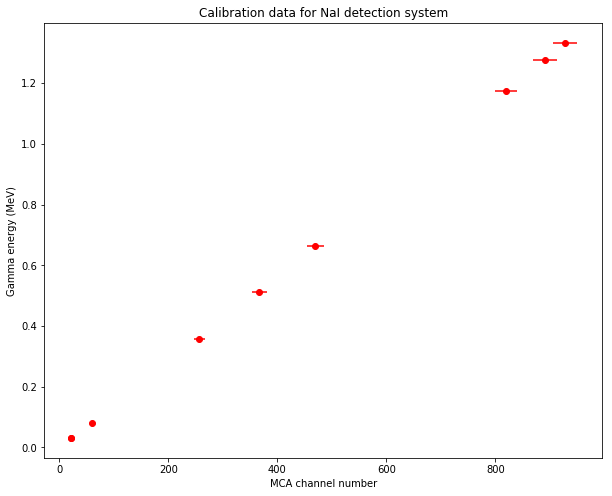

In [14]:
# Execute this to run a sanity-check plot
plt.figure(figsize=(10,8))
plt.xlabel('MCA channel number')
plt.ylabel('Gamma energy (MeV)')
plt.title('Calibration data for NaI detection system')
plt.errorbar(peaks,energies,xerr=delta_peaks/2,fmt='ro');

### Fit the calibration data to a line

Fit the calibration so that so that you obtain the coefficients necessary to convert a channel to an energy.

Then create a calibration function from these coefficients.

**Optional**: Use the uncertainties package to calculate the uncertainty in the energy from the uncertaities in the coefficients.

#### First make the fit
You have done this above.  Do it again.

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 9
    # variables        = 2
    chi-square         = 3.3530e-04
    reduced chi-square = 4.7900e-05
    Akaike info crit   = -87.7793088
    Bayesian info crit = -87.3848597
[[Variables]]
    slope:      0.00143659 +/- 6.5454e-06 (0.46%) (init = 0.001436594)
    intercept: -0.00632936 +/- 0.00362027 (57.20%) (init = -0.00632936)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.771


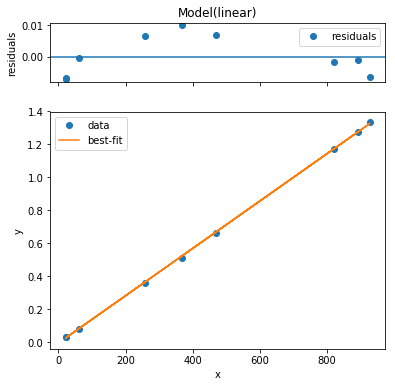

In [15]:
# Only need to import once:
# from lmfit.models import LinearModel

line = LinearModel()

param_guess = line.guess(energies, x=peaks)
linefit = line.fit(energies, param_guess, x=peaks)

print(linefit.fit_report())

linefit.plot();

#### Create and test your calibration function

Write a function that takes channel number and produces an energy in MeV.

In [16]:
# From the form "y = m*x + b", I'll create coefficients m and b with uncertainties

m = unc.ufloat(linefit.params['slope'].value,linefit.params['slope'].stderr)
b = unc.ufloat(linefit.params['intercept'].value,linefit.params['intercept'].stderr)

# and then write a calibration function:
def gamma_cal(channel,width=False,uncertainty=True):
    # uncertainty structure may not work for certain applications.
    if uncertainty:
        if width:
        # setting width to True allows a simple scaling of channels to energy change
            return m*channel
        else:
            return m*channel+b
    else:
        if width:
            return m.nominal_value*channel
        else:
            return m.nominal_value*channel+b.nominal_value
        
# Test the function, with uncertainities

delta_E = gamma_cal(np.sort(delta_peaks), width=True)

print('Peak widths and uncertainties in MeV')
for peak in delta_E:
    print('{:.1uP}'.format(peak))

Peak widths and uncertainties in MeV
0.00648±0.00003
0.00744±0.00003
0.00908±0.00004
0.0277±0.0001
0.0406±0.0002
0.0471±0.0002
0.0583±0.0003
0.0618±0.0003
0.0626±0.0003


## Study model of $\Delta E$ vs $E$

According to a simple model of detector resolution, the width of the photopeak should be proportional to the square root of the energy.  The simplest way to view this is to plot $(\Delta E)^2$ versus $E$.  If the model holds the points should lie on a line.

Try it out: make such a plot.

Then fit the data to a line, and extract the slope.  From this, extract the energy factor $Fw$  (See the lecture notes and lab instructions for explanation.)

#### Make the plot

of $E$ vs $(\Delta E)^2$.  Run the `peaks` and `delta_peaks` through your calibration function.

Note: if your calibration function returns a `ufloat` uncertainty object, these cannot be passed directly to the `plt.plot()` function.

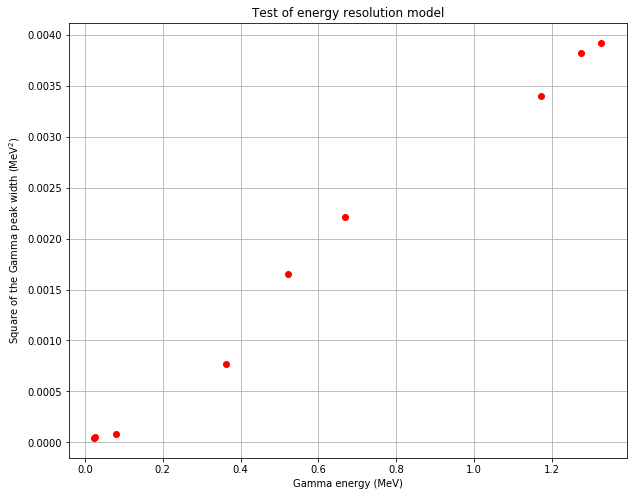

In [17]:
# Plotting will not work with uncertainty objects, so turn this off in the calibration function.

E = gamma_cal(peaks,uncertainty=False)
delta_E = gamma_cal(delta_peaks,width=True,uncertainty=False)

# Sanity plot.  Looks sort of linear.
plt.figure(figsize=(10,8))
plt.grid(True)
plt.xlabel('Gamma energy (MeV)')
plt.ylabel(r'Square of the Gamma peak width (MeV$^2$)')
plt.title('Test of energy resolution model')
plt.plot(E,delta_E**2,'ro');

#### Fit the data

One more time with a linear fit.

[[Model]]
    Model(linear)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 3
    # data points      = 9
    # variables        = 2
    chi-square         = 1.7449e-07
    reduced chi-square = 2.4928e-08
    Akaike info crit   = -155.827388
    Bayesian info crit = -155.432939
[[Variables]]
    slope:      0.00303830 +/- 1.0394e-04 (3.42%) (init = 0.003038297)
    intercept: -6.8102e-05 +/- 8.2081e-05 (120.53%) (init = -6.810181e-05)
[[Correlations]] (unreported correlations are < 0.100)
    C(slope, intercept) = -0.767


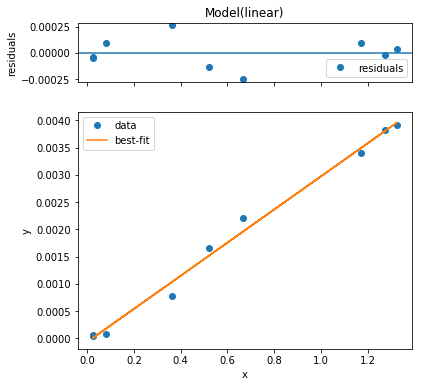

In [18]:
line2 = LinearModel()

param_guess2 = line2.guess(delta_E**2, x=E)
linefit2 = line2.fit(delta_E**2, param_guess2, x=E)

print(linefit2.fit_report())

linefit2.plot();

#### Calculate $Fw$

Obtain the slope and uncertainty.  Use these to calculate the quantity $Fw$, with uncertainty, in electron volts (eV).

In [19]:
this_slope = unc.ufloat(linefit2.params['slope'].value,linefit2.params['slope'].stderr)
Fw = this_slope/(2.35**2)
print('The estimated "Fano factor times energy per photoelectron" Fw = {:.2uP} eV'.format(Fw*1e6))

The estimated "Fano factor times energy per photoelectron" Fw = 550±19 eV
